In [1]:
from io import BytesIO
import requests
import xarray as xr
import hvplot.xarray
from skimage import io
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt

def download_data(url):
    r = requests.get(url)
    buf = BytesIO(r.content)
    return xr.open_dataset(buf)

# Generate data remotely
cmda_url = 'http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/universalPlotting3b'

# build query
query = dict(
    var1='clt',
    model1='NASA/MODIS',
    lonMethod=3,
    latMethod=3,
    presMethod=0,
    timeMethod=1,
    lonS=0,
    lonE=360,
    latS=-90,
    latE=90,
    presS=-999999,
    presE=-999999,
    timeS=200003,
    timeE=20011215,
    anomaly=0,
    ferretLevel=10,
    colorMap='rainbow',
    plotTitle='',
    plotType='undefined',
    inputSource=3,
    varA='',
    varB='',
    onlineFile='/home/svc/upload/coads_climatology.cdf',
    uploadFile='',
    uploadServerFile='',
    purpose='',
    userId='',
    serviceId=''
)

# 
r = requests.get(cmda_url, params=query)
print(r.url)
print(r.status_code)
# print(r.text)

http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/universalPlotting3b?var1=clt&model1=NASA%2FMODIS&lonMethod=3&latMethod=3&presMethod=0&timeMethod=1&lonS=0&lonE=360&latS=-90&latE=90&presS=-999999&presE=-999999&timeS=200003&timeE=20011215&anomaly=0&ferretLevel=10&colorMap=rainbow&plotTitle=&plotType=undefined&inputSource=3&varA=&varB=&onlineFile=%2Fhome%2Fsvc%2Fupload%2Fcoads_climatology.cdf&uploadFile=&uploadServerFile=&purpose=&userId=&serviceId=
200


In [2]:
# Download data into xarray Dataset object
data_url = r.json()['dataUrl']
ds = download_data(data_url)
print(ds.info())
ds

xarray.Dataset {
dimensions:
	LAT = 180 ;
	LON = 360 ;
	TIME = 1 ;
	bnds = 2 ;

variables:
	float64 LON(LON) ;
		LON:units = degrees_east ;
		LON:axis = X ;
		LON:long_name = longitude ;
		LON:modulo = 360.0 ;
		LON:point_spacing = even ;
		LON:standard_name = longitude ;
	float64 LAT(LAT) ;
		LAT:units = degrees_north ;
		LAT:axis = Y ;
		LAT:long_name = latitude ;
		LAT:point_spacing = even ;
		LAT:standard_name = latitude ;
	datetime64[ns] TIME(TIME) ;
		TIME:bounds = TIME_bnds ;
		TIME:axis = T ;
		TIME:long_name = time ;
		TIME:standard_name = time ;
	datetime64[ns] TIME_bnds(TIME, bnds) ;
	float64 DATA1(TIME, LAT, LON) ;
		DATA1:long_name = CLT_[X=0.00:360.00,Y=-90.00:90.00, T="15-MAR-2000", ] ;
		DATA1:history = From clt_MODIS_L3_C5_200003-201109 ;

// global attributes:
	:history = PyFERRET V7 (opt) 24-Jun-20 ;
	:Conventions = CF-1.6 ;
}None


<xarray.Dataset>
Dimensions:    (LAT: 180, LON: 360, TIME: 1, bnds: 2)
Coordinates:
  * LON        (LON) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * LAT        (LAT) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * TIME       (TIME) datetime64[ns] 2000-03-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) datetime64[ns] ...
    DATA1      (TIME, LAT, LON) float64 ...
Attributes:
    history:      PyFERRET V7 (opt) 24-Jun-20
    Conventions:  CF-1.6

In [6]:
ds.DATA1.hvplot.quadmesh('LON', 'LAT', widget_location='bottom', projection=ccrs.PlateCarree(), crs=ccrs.PlateCarree(), geo=True, coastline=True)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='time', options=[numpy.datetime64('2000-03...], value=numpy.datetime64('2000-03-..., width=250)
        [2] HSpacer()

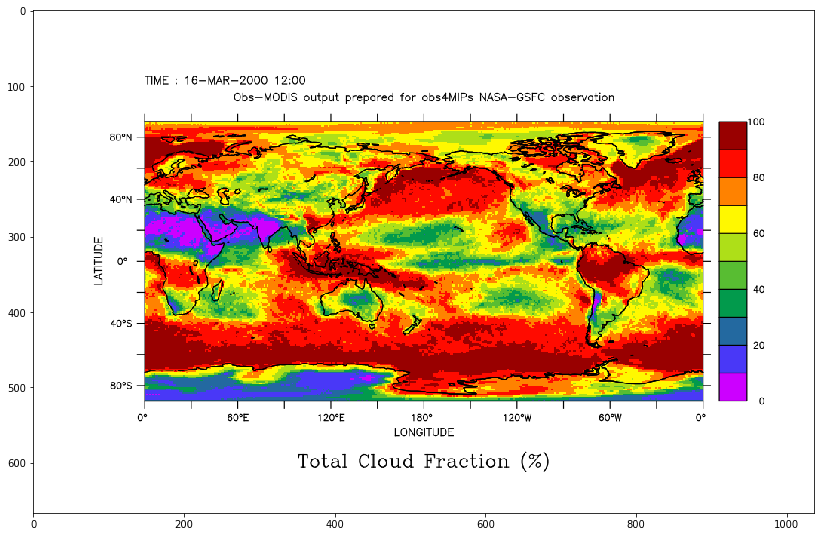

In [3]:
# data from api
image = io.imread(r.json()['url'])
f,ax = plt.subplots(1,figsize=(14,12))
ax.imshow(image)
plt.show()